In [1]:
%matplotlib ipympl
def figure(name, nrows=1, ncols=1, *args, **kwargs):
    plt.close(name)
    return plt.subplots(nrows, ncols, num=name, *args, **kwargs)

def figure3d(name, nrows=1, ncols=1, *args, **kwargs):
    plt.close(name)
    return plt.subplots(nrows, ncols, num=name, subplot_kw={"projection": "3d"}, *args, **kwargs)

import numpy as np
import pylab as plt
plt.style.use('default')

In [2]:
from ipywidgets import FloatSlider, HBox, Text
import numpy.fft as ft

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

# Aufgabe 1

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
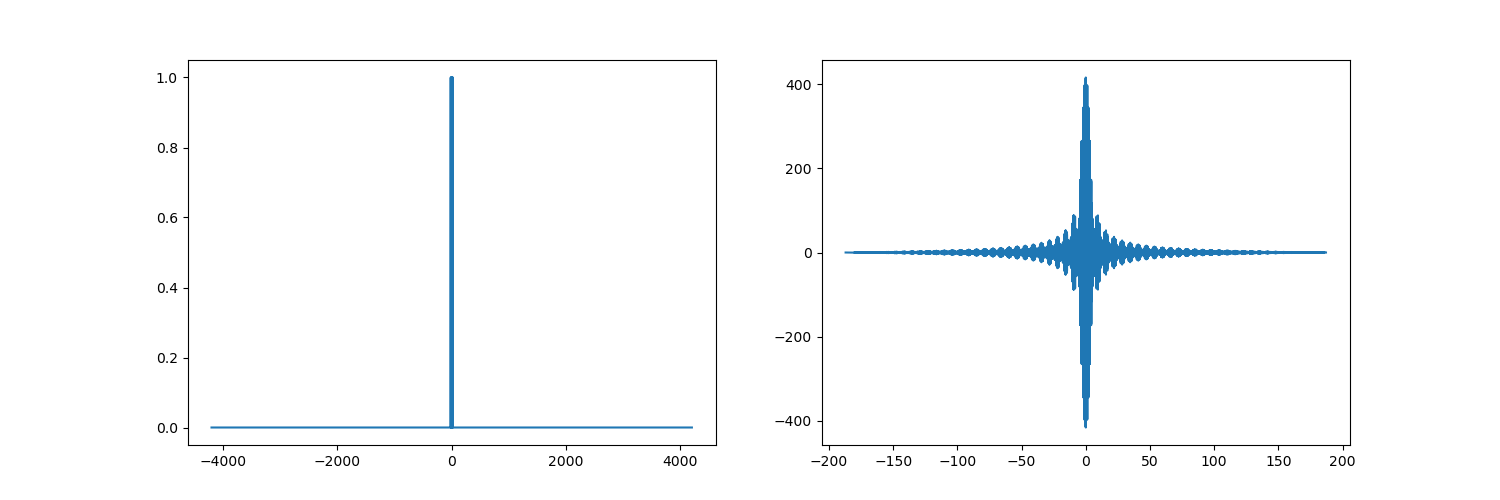

In [26]:
Nt = 500000
N = 7
a = 1
d = 6

x = np.linspace(-100*N*d, 100*N*d, Nt)
func = np.zeros(Nt)
ft_func_a = np.zeros(Nt, dtype=np.complex128)
f = ft.fftshift(ft.fftfreq(Nt, d=x[1]-x[0]))*2*np.pi

for n in range(N):
    ind = np.logical_and(x > (n - (N-1)/2)*d - a/2, x < (n - (N-1)/2)*d + a/2)
    func[ind] = 1
    
ft_func = ft.fftshift(ft.fft(func))

fig, ax = figure('show_func', 1, 2, figsize=(15, 5))
ax[0].plot(x, func)
ax[1].plot(f, ft_func)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
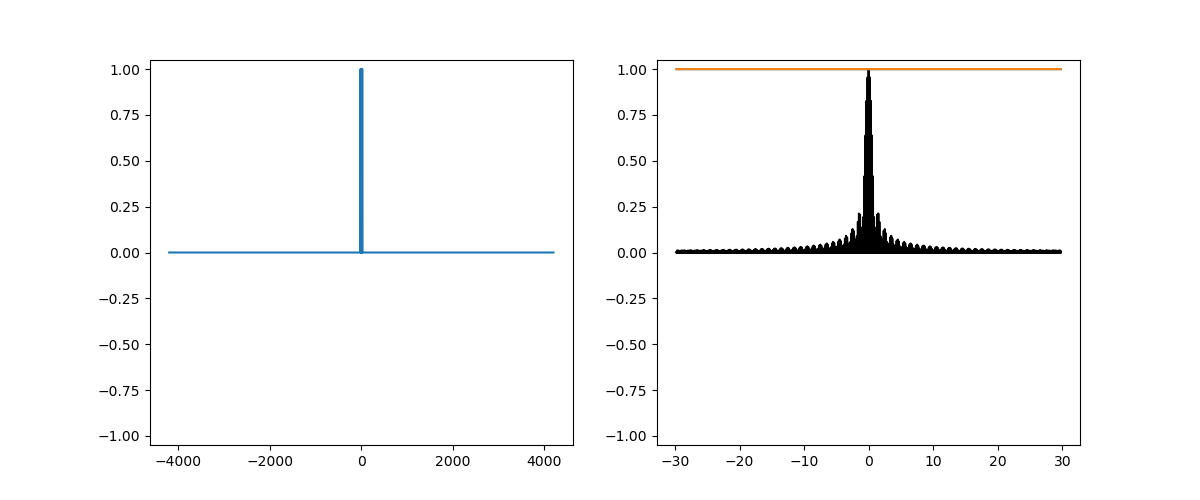

In [28]:
def get_slider():
    sk = FloatSlider(
        orientation='horizontal', description='k: ',
        value=1, min=0, max=100, step=1
    )
    sz = FloatSlider(
        orientation='horizontal', description='z: ',
        value=0, min=0, max=10000, step=0.01
    )
    ft_func = ft.fftshift(ft.fft(func))
    f = ft.fftshift(ft.fftfreq(Nt, d=x[1]-x[0]))

    k = sk.value*np.pi
    z = sz.value
    fac = np.exp(1j * np.sqrt(k**2 - f.astype(np.complex)**2) * z)
    w = f.astype(np.complex) * 2*np.pi
    tfunc = np.sinc(a/2*k*x/z)

    fig, ax = figure(4, 1, 2, figsize=(12, 5))
    lines = []
    lines.append(ax[0].plot(x, tfunc, 'k-')[0])
    lines.append(ax[0].plot(x, ft.ifft(ft.ifftshift(ft_func)))[0])
    lines.append(ax[1].plot(f, fac)[0])
    lines.append(ax[1].plot(f, fac)[0])
    lines.append(ax[1].plot(f, np.abs(ft_func)/np.max(np.abs(ft_func)), 'k', zorder=0)[0])

    # ax[0].set_xlim([-25.1, 25.1])        
    ax[0].set_ylim([-1.05, 1.05])
    ax[1].set_ylim([-1.05, 1.05])
    # ax[1].set_xlim([-5.6, 5.6])
    
    def redraw(change):
        k = sk.value*np.pi
        z = sz.value
        fac = np.exp(1j * np.sqrt(k**2 - w**2) * z)
        tfunc = np.sinc(a/2*k/(np.pi)*x/z)
        
        lines[1].set_data(x, np.real(ft.ifft(ft.ifftshift(ft_func*fac))))
        lines[0].set_data(x, tfunc)

        lines[2].set_data(f, np.real(fac))
        lines[3].set_data(f, np.imag(fac))

            
        fig.canvas.draw()
        fig.canvas.flush_events()
        
    sk.observe(redraw, names='value')
    sz.observe(redraw, names='value')
    return HBox([sk, sz])

get_slider()

# Aufgabe 2

In [6]:
from scipy.special import jv

In [43]:
mu = .3
X, Y = np.meshgrid(np.linspace(-300, 300, 100), np.linspace(-300, 300, 100))
X2, Y2 = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

T = np.zeros_like(X2)
a = .1
T[X2**2/mu**2+Y2**2 < 1] = 1
z = 100
R = np.sqrt(mu**2 * X**2 + Y**2 + z**2)
eta = a*np.sqrt(mu**2 * X**2 + Y**2)/R

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
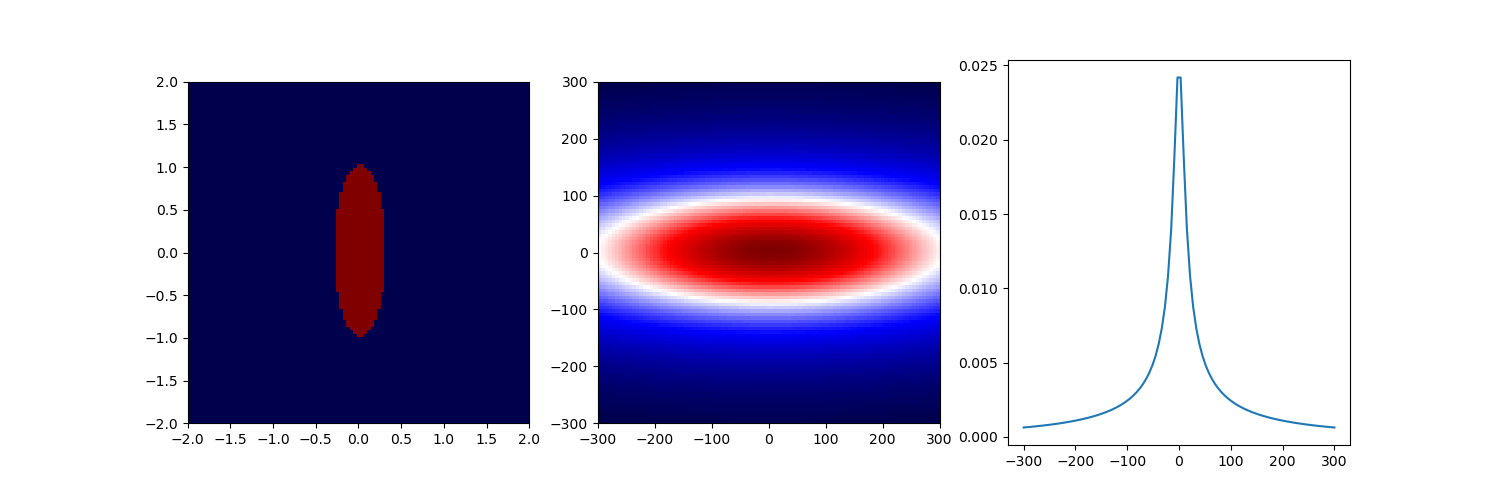

In [44]:
fig, ax = figure('bessel', 1, 3, figsize=(15, 5))
ax[0].pcolormesh(X2, Y2, T, cmap=plt.get_cmap('seismic'))
ax[0].set_aspect('equal')

ax[1].pcolormesh(X, Y, jv(1, eta)/eta/R**2, cmap=plt.get_cmap('seismic'))
ax[1].set_aspect('equal')

ax[2].plot(X[50, :], jv(eta[50, :], 1)/ eta[50,:] / R[50,:]**2)

# Aufgabe 3

(-40.6, 40.6)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
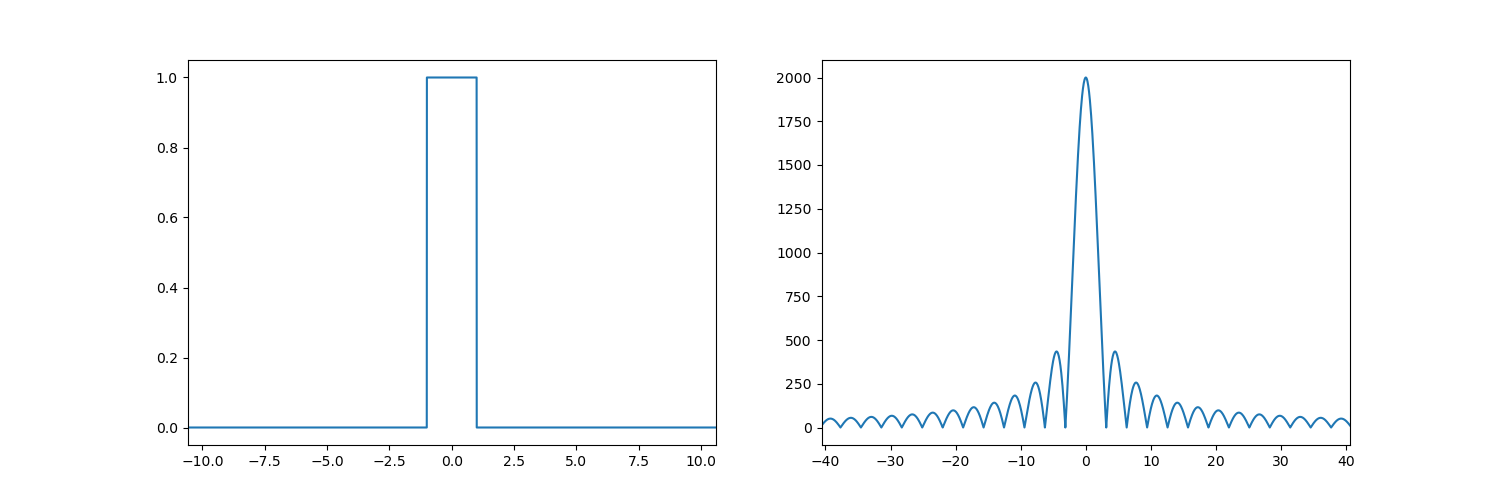

In [24]:
Nx = 100000
x = np.linspace(-50, 50, Nx)
func = np.zeros(Nx)
f = ft.fftshift(ft.fftfreq(Nx, d=x[1]-x[0]))*2*np.pi

func[np.abs(x) < 1] = 1
    
ft_func = ft.fftshift(ft.fft(func))

fig, ax = figure('show_func2', 1, 2, figsize=(15, 5))
ax[0].plot(x, func)
ax[1].plot(f, np.abs(ft_func))

ax[0].set_xlim([-10.6, 10.6])
ax[1].set_xlim([-40.6, 40.6])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
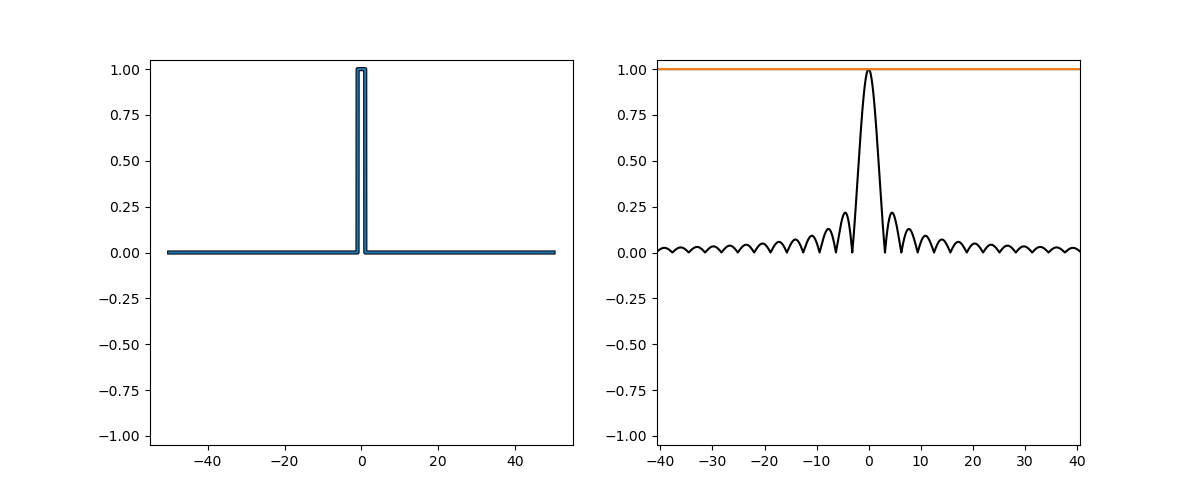

In [25]:
def get_slider():
    sk = FloatSlider(
        orientation='horizontal', description='k: ',
        value=20, min=0, max=1000, step=1
    )
    sz = FloatSlider(
        orientation='horizontal', description='z: ',
        value=0, min=0, max=1000, step=0.1
    )
    sp = FloatSlider(
        orientation='horizontal', description='phi: ',
        min=-np.pi/2, value=0, max=np.pi/2, step=np.pi/200
    )
    
    k = sk.value*np.pi
    z = sz.value
    phi = sp.value
    w = f.astype(np.complex) * 2*np.pi
    fac = np.exp(1j * np.sqrt(k**2 - w**2) * z)

    

    fig, ax = figure(4, 1, 2, figsize=(12, 5))
    lines = []
    lines.append(ax[0].plot(x, np.abs(ft.ifft(ft.ifftshift(ft_func))), 'k-', lw=3)[0])
    lines.append(ax[0].plot(x, ft.ifft(ft.ifftshift(ft_func)))[0])

    lines.append(ax[1].plot(f, fac)[0])
    lines.append(ax[1].plot(f, fac)[0])
    lines.append(ax[1].plot(f, np.abs(ft_func)/np.max(np.abs(ft_func)), 'k', zorder=0)[0])

    # ax[0].set_xlim([-25.1, 25.1])        
    ax[0].set_ylim([-1.05, 1.05])
    ax[1].set_ylim([-1.05, 1.05])
    ax[1].set_xlim([-40.6, 40.6])
    
    def redraw(change):
        k = sk.value*np.pi
        z = sz.value
        phi = sp.value
        ft_func = ft.fftshift(ft.fft(func*np.exp(1j*phi*x)))
        fac = np.exp(1j * np.sqrt(k**2 - w**2) * z)
        
        lines[0].set_data(x, np.abs(ft.ifft(ft.ifftshift(ft_func*fac))))
        lines[1].set_data(x, np.real(ft.ifft(ft.ifftshift(ft_func*fac))))

        lines[2].set_data(f, np.real(fac))
        lines[3].set_data(f, np.imag(fac))

            
        fig.canvas.draw()
        fig.canvas.flush_events()
        
    sk.observe(redraw, names='value')
    sz.observe(redraw, names='value')
    sp.observe(redraw, names='value')
    return HBox([sk, sz, sp])

get_slider()